## Notebook To Display Interactive Time Series for CO2 Data
Elena Reinisch, 2018-09-11

## Load Libraries and Data

In [168]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
import numpy as np

from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [91]:
%run -i load_data.py

## View Data

In [92]:
co2_data_table.head()

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
0,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
1,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
3,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
4,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)


We get a first look at how many unique sites we have.

In [93]:
len(co2_geo_data_table.Latitude.unique())

1352

Now we determine which flux column to take based on the number of measurements.

In [94]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux'].isna()])

4033

In [95]:
len(co2_geo_data_table[co2_geo_data_table['CO2 Flux.1'].isna()])

4437

Because there are more records of CO2 Flux.1, we use these values for CO2 flux.

## Plot Static World Map

In [96]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


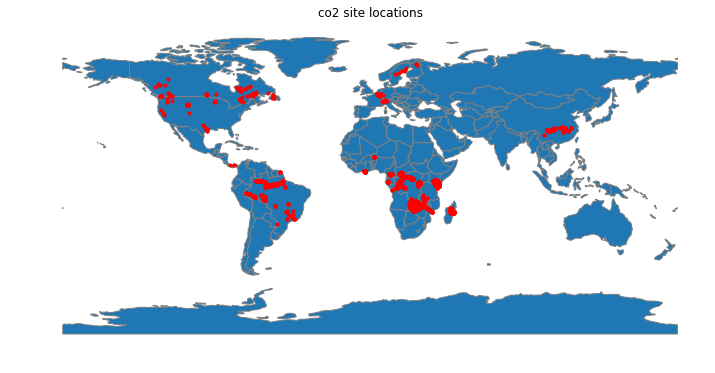

In [97]:
f, ax = plt.subplots(1, figsize=(12, 6))
ax.set_title('co2 site locations')
world.plot(ax=ax, edgecolor='gray')
co2_geo_data_table.plot(ax=ax, marker='.', color='r')
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

## Plot Values for North America in Interactive Map

### Initialize new figure

In [98]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Pull Data from N. America

In [99]:
NA_co2_geo_data_table = co2_geo_data_table[co2_geo_data_table.Latitude.between(23, 90) & co2_geo_data_table.Longitude.between(-131, -68)] 

In [100]:
NA_co2_geo_data_table.describe()

,Latitude,Longitude,Altitude,Discharge,Stream Slope,Width,Depth,Flow Velocity,Wind Speed,POC,...,pH,Water Temperature,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1
count,110.000000,110.000000,30.000000,0.0,0.0,40.000000,40.000000,0.0,0.0,2.000000,...,30.000000,30.000000,0.0,0.0,0.0,47.000000,0.0,0.0,0.0,62.000000
mean,46.024807,-97.801554,2342.866667,NaN,NaN,19.297250,0.766750,NaN,NaN,1.350000,...,7.683333,9.448667,NaN,NaN,NaN,1063.165957,NaN,NaN,NaN,315.764516
std,7.308169,17.756859,696.002563,NaN,NaN,65.361477,2.443879,NaN,NaN,0.494975,...,0.360262,2.970441,NaN,NaN,NaN,1265.263493,NaN,NaN,NaN,373.343924
min,28.878333,-126.000000,1211.000000,NaN,NaN,1.500000,0.030000,NaN,NaN,1.000000,...,6.630000,6.230000,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,-325.900000
25%,44.336180,-107.147989,1660.750000,NaN,NaN,5.677500,0.070000,NaN,NaN,1.175000,...,7.522500,7.187500,NaN,NaN,NaN,318.500000,NaN,NaN,NaN,120.850000
50%,46.600000,-101.933334,2629.000000,NaN,NaN,6.540000,0.145000,NaN,NaN,1.350000,...,7.715000,7.695000,NaN,NaN,NaN,542.000000,NaN,NaN,NaN,318.950000
75%,50.300000,-77.000000,2863.500000,NaN,NaN,10.155000,0.555000,NaN,NaN,1.525000,...,7.922500,11.460000,NaN,NaN,NaN,960.000000,NaN,NaN,NaN,462.625000
max,59.600000,-68.400000,3311.000000,NaN,NaN,420.000000,15.500000,NaN,NaN,1.700000,...,8.170000,15.610000,NaN,NaN,NaN,6277.000000,NaN,NaN,NaN,1569.300000


### Plot Points with Labels of Reference and Site Type

In [101]:
firstmap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=4)
for index, row in NA_co2_geo_data_table.iterrows():
    iconcolor='blue'
    if pd.isnull(row['CO2']): # no CO2 values
        if pd.isnull(row['CO2 Flux.1']): # no CO2 values and no flux values
            iconcolor = 'red'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: no CO2 values".format(row['Site Type']),
                                  icon=folium.Icon(color=iconcolor, icon='warning-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'blue'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 flux =\n {} mg C m-2 d-1".format(row['Site Type'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
    else: # CO2 values
        if pd.isnull(row['CO2 Flux.1']): # CO2 values but no flux values
            iconcolor = 'purple'
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: CO2 =\n {} micro-atm".format(row['Site Type'], row['CO2']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)
        else:
            iconcolor = 'green' # both CO2 values and flux values
            marker = folium.Marker((row['Latitude'],row['Longitude']), popup="{}: \n CO2 = {} micro-atm \n CO2 flux = {} mg C m-2 d-1".format(row['Site Type'], row['CO2'], row['CO2 Flux.1']),
                                  icon=folium.Icon(color=iconcolor, icon='info-sign'))
            marker.add_to(firstmap)

### Visualize Map

In [102]:
firstmap

## Plot Interactive Time Series

Our goal is to create an interactive time series map showing locations of records over time.  To do so, we will use `TimeSliderChoropleth` available from `folium.plugins`.  In order to do so, we will first need to clean our time data.  Some of the data is available in 'YYYYMMDD' format, while others are given in year only, and still others are in a format that is unrecognizable.  We will work with the 'YYYYMMDD' and 'YYYY' data, but first we need to get this data into a single format.  We choose 'YYYYMMDD'.

### Clean Up DateTime Records

First, we look at all of the available data with date values.

In [199]:
co2_geo_data_table[~co2_geo_data_table['DateTime'].isna()]

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry,ModifiedDateTime
0,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,140.5,NaN,-18.104,1381.28000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066),20040701.0
1,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,140.5,NaN,-18.320,1267.75000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066),20040701.0
2,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,140.5,NaN,-35.512,1449.39000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066),20040701.0
3,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,140.5,NaN,-20.488,1025.55000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066),20040701.0
4,"Alin and Richey, 2012",small stream,-10.06600,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,140.5,NaN,-22.272,1411.55000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066),20040701.0
5,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,860.3,NaN,3.264,306.15000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999),20040702.0
6,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,860.3,NaN,2.712,270.20000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999),20040702.0
7,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,860.3,NaN,3.896,370.11000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999),20040702.0
8,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,860.3,NaN,3.832,368.21000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999),20040702.0
9,"Alin and Richey, 2012",small stream,-9.75100,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,860.3,NaN,8.960,779.57000,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999),20040702.0


The dates are in different formats.  While some dates are not identifiable, we can determine that some dates are year-only.  To be able to incoporate these into our data set, we will adjust these dates to read as YYYYMMDD.  We first create a new column called 'ModifiedDateTime' which contains the values of 'DateTime' converted to float64.

In [200]:
co2_geo_data_table['ModifiedDateTime'] = pd.Series(pd.to_numeric(co2_geo_data_table['DateTime'], errors='coerce'), dtype='int64')

In [201]:
co2_geo_data_table.ModifiedDateTime.fillna(0)

0       20040701.0
1       20040701.0
2       20040701.0
3       20040701.0
4       20040701.0
5       20040702.0
6       20040702.0
7       20040702.0
8       20040702.0
9       20040702.0
10      20040702.0
11      20040705.0
12      20040705.0
13      20040705.0
14      20040705.0
15      20040705.0
16      20040705.0
17      20040705.0
18      20040714.0
19      20040714.0
20      20040714.0
21      20040714.0
22      20040714.0
23      20040717.0
24      20040718.0
25      20040718.0
26      20040718.0
27      20040718.0
28      20040718.0
29      20040719.0
           ...    
4539       37958.0
4540       37989.0
4541       38020.0
4542       38049.0
4543       37714.0
4544       37744.0
4545       37775.0
4546       37805.0
4547       37836.0
4548       37867.0
4549       37897.0
4550       37928.0
4551       37958.0
4552       37989.0
4553       38020.0
4554       38049.0
4555           0.0
4556           0.0
4557           0.0
4558           0.0
4559           0.0
4560        

Now we take all the values that were recorded by year-only and convert them to 'YYYYMMDD' by multiplying by 1e4.  

In [202]:
co2_geo_data_table.loc[co2_geo_data_table['ModifiedDateTime'] < 3000, 'ModifiedDateTime'] = co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 3000].ModifiedDateTime*1e4+101

We confirm that the values were changed correctly.

In [203]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 3000].ModifiedDateTime

Series([], Name: ModifiedDateTime, dtype: float64)

This means that there are no longer any values below 3000 (e.g., 2012).  We confirm the minimum of the data set to be from the unrecognized date format.

In [204]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] < 50000].ModifiedDateTime.min()

37714.0

Lastly, we check that 2012 was correctly incorporated.

In [205]:
co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] > 20110000].ModifiedDateTime.min()

20120101.0

### Test Data Set

We can now isolate this subset of usable data and convert the values to DateTime.

In [463]:
#co2_geo_data_table_TS_subset = co2_geo_data_table[(co2_geo_data_table['ModifiedDateTime'] > 20010000) & (co2_geo_data_table['ModifiedDateTime'] < 20050000)]
co2_geo_data_table_TS_subset = co2_geo_data_table[(co2_geo_data_table['ModifiedDateTime'] > 20010000) & (co2_geo_data_table['ModifiedDateTime'] < 20050000)]

#co2_geo_data_table_TS_subset.reset_index()

In [464]:

# xy = zip(co2_geo_data_table_TS_subset['Longitude'], co2_data_table['Latitude'])
# xy1 = zip(co2_geo_data_table_TS_subset['Longitude'], co2_data_table['Latitude']+.0001)
# x1y1 = zip(co2_geo_data_table_TS_subset['Longitude']+.0001, co2_data_table['Latitude']+.0001)
# x1y = zip(co2_geo_data_table_TS_subset['Longitude']+.0001, co2_data_table['Latitude'])
#for record in 
#geometry = Polygon(((co2_geo_data_table_TS_subset['Longitude'], co2_data_table['Latitude']), (co2_geo_data_table_TS_subset['Longitude'], co2_data_table['Latitude']+.0001),
#                   (co2_geo_data_table_TS_subset['Longitude']+.0001, co2_data_table['Latitude']+.0001), (co2_geo_data_table_TS_subset['Longitude']+.0001, co2_data_table['Latitude']),
#                   (co2_geo_data_table_TS_subset['Longitude'], co2_data_table['Latitude'])))

In [465]:
Polygon?

In [466]:
co2_geo_data_table_TS_subset['ModifiedDateTime'] = pd.to_datetime(co2_geo_data_table_TS_subset['ModifiedDateTime'].astype('int64').astype('str'), yearfirst=True)

load_data.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  #!/bin/env python


In [467]:
datetime_index = pd.DatetimeIndex(co2_geo_data_table_TS_subset['ModifiedDateTime'])
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

Index(['1088640000', '1088640000', '1088640000', '1088640000', '1088640000',
       '1088726400', '1088726400', '1088726400', '1088726400', '1088726400',
       ...
       '1093219200', '1093219200', '1093219200', '1093219200', '1093305600',
       '1093305600', '1093305600', '1093305600', '1093305600', '1093305600'],
      dtype='object', name='ModifiedDateTime', length=105)

In [468]:
datetime_index

DatetimeIndex(['2004-07-01', '2004-07-01', '2004-07-01', '2004-07-01',
               '2004-07-01', '2004-07-02', '2004-07-02', '2004-07-02',
               '2004-07-02', '2004-07-02',
               ...
               '2004-08-23', '2004-08-23', '2004-08-23', '2004-08-23',
               '2004-08-24', '2004-08-24', '2004-08-24', '2004-08-24',
               '2004-08-24', '2004-08-24'],
              dtype='datetime64[ns]', name='ModifiedDateTime', length=105, freq=None)

In [469]:
co2_geo_data_table_TS_subset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             95,  96,  97,  98,  99, 100, 101, 102, 103, 104],
           dtype='int64', length=105)

In [470]:
len(co2_geo_data_table_TS_subset.index)

105

In [471]:
co2_geo_data_table_TS_subset.columns

Index(['Reference', 'Site Type', 'Latitude', 'Longitude', 'DateTime',
       'Altitude', 'Discharge', 'Stream Slope', 'Width', 'Depth',
       'Flow Velocity', 'Wind Speed', 'POC', 'DOC', 'TOC', 'pH',
       'Water Temperature', 'Air Temperature', 'DO', 'Chl a', 'CO2', 'k',
       'k600', 'CO2 Flux', 'CO2 Flux.1', 'Source', 'geometry',
       'ModifiedDateTime'],
      dtype='object')

In [476]:
 co2_geo_data_table_TS_subset.loc[0]

Reference                                        Alin and Richey, 2012
Site Type                                                 small stream
Latitude                                                       -10.066
Longitude                                                      -67.606
DateTime                                                      20040701
Altitude                                                           150
Discharge                                                          NaN
Stream Slope                                                       NaN
Width                                                              NaN
Depth                                                              NaN
Flow Velocity                                                      NaN
Wind Speed                                                           0
POC                                                                NaN
DOC                                                                NaN
TOC   

In [513]:
styledata = {}
n_periods = len(dt_index)
n_sample = 40
df_record_index = 0
for record in co2_geo_data_table_TS_subset.index:
    co2_geo_data_table_TS_subset.geometry.at[record] = Polygon(((co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude+1),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude+1, co2_data_table.loc[record].Latitude+1),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude+1, co2_data_table.loc[record].Latitude),
                                                                (co2_geo_data_table_TS_subset.loc[record].Longitude, co2_data_table.loc[record].Latitude)))
    df = pd.DataFrame(
         {'color': np.random.normal(size=n_periods),
          'opacity':   np.random.normal(size=n_periods)},
         index=dt_index)
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    df.iloc[df_record_index].opacity = co2_geo_data_table_TS_subset.iloc[df_record_index].CO2
    styledata[df_record_index] = df
    df_record_index += 1
    
#     df = pd.DataFrame(
#         {'color': np.random.normal(size=n_periods),
#          'opacity': np.random.normal(size=n_periods)},
#         index=dt_index)
#     df = df.cumsum()
#     df.sample(n_sample, replace=False).sort_index()
#     styledata[record] = df

In [514]:
styledata

{0:                      color     opacity
 ModifiedDateTime                      
 1088640000        0.088463  140.500000
 1088640000       -0.028943   -3.161098
 1088640000        2.641708   -3.842024
 1088640000        4.117921   -4.379571
 1088640000        3.358970   -4.586422
 1088726400        1.388444   -5.252012
 1088726400        1.720452   -6.896635
 1088726400        0.457634   -8.879157
 1088726400       -1.225753   -8.092146
 1088726400       -2.424996   -7.979076
 1088726400       -0.396268   -6.847039
 1088985600        0.177231   -6.201314
 1088985600       -0.153112   -7.113031
 1088985600       -0.398889   -8.718389
 1088985600       -1.758980  -10.548355
 1088985600       -1.063051  -11.197880
 1088985600       -1.797986  -12.434458
 1088985600       -1.146358  -11.291137
 1089763200       -1.786501  -11.864960
 1089763200       -2.118027  -10.921451
 1089763200       -3.097102  -10.895512
 1089763200       -3.875520   -9.582368
 1089763200       -3.456508   -8.5143

In [515]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():     
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())     
    max_opacity = min(max_color, data['opacity'].max())

In [516]:
from branca.colormap import linear


cmap = linear.PuRd_09.scale(min_color, max_color)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])
    data['opacity'] = (data['opacity'])

In [517]:
styledata.get(0).head()

,color,opacity
ModifiedDateTime,,
1088640000,#f6f3f8,1.000000
1088640000,#f6f3f9,0.085763
1088640000,#eae4f1,0.081430
1088640000,#e2d5e9,0.078009
1088640000,#e6deee,0.076693


In [518]:
styledata.items()

dict_items([(0,                     color   opacity
ModifiedDateTime                   
1088640000        #f6f3f8  1.000000
1088640000        #f6f3f9  0.085763
1088640000        #eae4f1  0.081430
1088640000        #e2d5e9  0.078009
1088640000        #e6deee  0.076693
1088726400        #f0ebf5  0.072457
1088726400        #eee9f4  0.061991
1088726400        #f4f0f7  0.049374
1088726400        #f7f4f9  0.054383
1088726400        #f7f4f9  0.055102
1088726400        #f7f4f9  0.062306
1088985600        #f5f2f8  0.066416
1088985600        #f7f4f9  0.060614
1088985600        #f7f4f9  0.050397
1088985600        #f7f4f9  0.038752
1088985600        #f7f4f9  0.034618
1088985600        #f7f4f9  0.026749
1088985600        #f7f4f9  0.034025
1089763200        #f7f4f9  0.030373
1089763200        #f7f4f9  0.036378
1089763200        #f7f4f9  0.036543
1089763200        #f7f4f9  0.044899
1089763200        #f7f4f9  0.051696
1090022400        #f7f4f9  0.058035
1090108800        #f7f4f9  0.045820
1090108800  

In [519]:
styledict = {
    str(record): data.to_dict(orient='index') for
    record, data in styledata.items()
}

In [521]:
co2_geo_data_table_TS_subset['ModifiedDateTime'] = co2_geo_data_table_TS_subset['ModifiedDateTime'].astype('str') 

load_data.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  #!/bin/env python


In [522]:
co2_geo_data_table_TS_TSmap = co2_geo_data_table_TS_subset[['Latitude', 'Longitude','geometry']].copy()

In [523]:
co2_geo_data_table_TS_subset.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Reference": "Alin and Richey, 2012", "Site Type": "small stream", "Latitude": -10.066, "Longitude": -67.606, "DateTime": 20040701, "Altitude": 150.0, "Discharge": null, "Stream Slope": null, "Width": null, "Depth": null, "Flow Velocity": null, "Wind Speed": 0.0, "POC": null, "DOC": null, "TOC": null, "pH": null, "Water Temperature": 26.0, "Air Temperature": 28.1, "DO": null, "Chl a": null, "CO2": 140.5, "k": null, "k600": -18.104, "CO2 Flux": 1381.28, "CO2 Flux.1": null, "Source": "Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-06 CO2 Exchange in River Systems Across the Amazon Basin: 2004-2007.", "ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Polygon", "coordinates": [[[-67.606, -10.066], [-67.606, -9.066], [-66.606, -9.066], [-66.606, -10.066], [-67.606, -10.066]]]}}, {"id": "1", "type": "Feature", "properties": {"Reference": "Alin and Richey, 2012", "Site Type": "small stream", "Latit

In [525]:
m = folium.Map([-10, -55], zoom_start=4)

g = TimeSliderChoropleth(
    co2_geo_data_table_TS_subset.to_json(),
    styledict=styledict,

).add_to(m)

m.save('InteractiveTimeSeries.html')

m

In [117]:
co2_geo_data_table_TS_subset.ModifiedDateTime.unique()

array([20040701., 20040702., 20040705., 20040714., 20040717., 20040718.,
       20040719., 20040720., 20040722., 20040810., 20040811., 20040812.,
       20040813., 20040814., 20040815., 20040816., 20040817., 20040818.,
       20040819., 20040820., 20040823., 20040824., 20050301., 20050302.,
       20050303., 20050304., 20050305., 20050307., 20050308., 20050309.,
       20050312., 20050313., 20050713., 20050715., 20050716., 20050719.,
       20050721., 20050725., 20050726., 20050727., 20050818., 20050820.,
       20050826., 20050829., 20050830., 20050831., 20050904., 20061125.,
       20061127., 20061130., 20061211., 20061213., 20061215., 20070111.,
       20070123., 20140101., 20120101.])

In [155]:
#(co2_geo_data_table_TS_subset.ModifiedDateTime.at[0] < 20050000) & (co2_geo_data_table_TS_subset.ModifiedDateTime.at[0] > 20040000)

In [157]:
dicts = {}
keys = range(len(co2_geo_data_table_TS_subset.ModifiedDateTime)+1)

for i in co2_geo_data_table_TS_subset.index:
    if co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2004:
        color = '#cc9ecc'
        opacity = 0.696947
            
    elif co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2005:
        color = '#e159a9'
        opacity = 0.692121
            
    elif co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2006:
        color = '#db6fb5' 
        opacity = 0.183145
            
    elif co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2007:
        color = '#cb9bcb' 
        opacity = 0.543378
            
    elif co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2012:
        color = '#d7bedd' 
        opacity = -0.148390
            
    elif co2_geo_data_table_TS_subset.ModifiedDateTime.at[i].year == 2014:
        color = '#decee6'
        opacity = 0.496947
           
    dicts[i] = {co2_geo_data_table_TS_subset.ModifiedDateTime.astype('str').at[i]: {'color': color, 'opacity': opacity}}

#Now that we the corrected data subset in DateTime format, we can start to define the style dictionary that maps from date to color for the interactive time series map.  We check the boundaries of the data set and define the dictionary as follows.

In [25]:
#co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] > 50000].ModifiedDateTime.min()

20040701.0

In [26]:
#co2_geo_data_table[co2_geo_data_table['ModifiedDateTime'] > 50000].ModifiedDateTime.max()

20140101.0

#It looks as though the dates range from 2004 to 2014, but closer inspection of the data set leads us to believe there is a gap between 2005 and 2012.

In [27]:
#co2_geo_data_table[(co2_geo_data_table['ModifiedDateTime'] > 500000) & (co2_geo_data_table['ModifiedDateTime'] < 20120000)].ModifiedDateTime.min()

20040701.0

#We define the style dictionary with a date range of [2004, 2012:2014].

In [29]:
# co2_geo_data_table_TS_subset.to_dict(orient='index')

{0: {'Reference': 'Alin and Richey, 2012',
  'Site Type': 'small stream',
  'Latitude': -10.066,
  'Longitude': -67.606,
  'DateTime': 20040701,
  'Altitude': 150.0,
  'Discharge': nan,
  'Stream Slope': nan,
  'Width': nan,
  'Depth': nan,
  'Flow Velocity': nan,
  'Wind Speed': 0.0,
  'POC': nan,
  'DOC': nan,
  'TOC': nan,
  'pH': nan,
  'Water Temperature': 26.0,
  'Air Temperature': 28.1,
  'DO': nan,
  'Chl a': nan,
  'CO2': 140.5,
  'k': nan,
  'k600': -18.104,
  'CO2 Flux': 1381.28,
  'CO2 Flux.1': nan,
  'Source': 'Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-06 CO2 Exchange in River Systems Across the Amazon Basin: 2004-2007.',
  'geometry': <shapely.geometry.point.Point at 0x7f17b7089c88>,
  'ModifiedDateTime': Timestamp('2004-07-01 00:00:00')},
 1: {'Reference': 'Alin and Richey, 2012',
  'Site Type': 'small stream',
  'Latitude': -10.066,
  'Longitude': -67.606,
  'DateTime': 20040701,
  'Altitude': 150.0,
  'Discharge': nan,
  'Stream Slope': nan,
  'Width': nan,
  'Dept

In [ ]:
# styledict = {
#     str(country): data.to_dict(orient='index') for
#     country, data in styledata.items()
# }


In [39]:
# styledict = {
#     '0': {'2004-01-01': {'color': 'ffffff', 'opacity': 1}, 
#           '2004-12-31': {'color': 'fffff0', 'opacity': 1}},
#     '1': {'2012-01-01': {'color': 'ffffff', 'opacity': 1},
#           '2012-12-31': {'color': 'fffff0', 'opacity': 1}},
#     '2': {'2013-01-01': {'color': 'ffffff', 'opacity': 1}, 
#           '2013-12-31': {'color': 'fffff0', 'opacity': 1}},
#     '3': {'2014-01-01': {'color': 'ffffff', 'opacity': 1}, 
#           '2014-12-31': {'color': 'fffff0', 'opacity': 1}}
# }

# mydict = {
#     "key1": 1,
#     "key2": 2,
#     "key3": 3,
# }


We also need to rename the indices to match the style dictionary.

In [29]:
#co2_geo_data_table_TS_subset.set_index('ModifiedDateTime')

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
ModifiedDateTime,,,,,,,,,,,,,,,,,,,,,
2004-07-01,"Alin and Richey, 2012",small stream,-10.0660,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.280,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2004-07-01,"Alin and Richey, 2012",small stream,-10.0660,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.750,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2004-07-01,"Alin and Richey, 2012",small stream,-10.0660,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.390,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2004-07-01,"Alin and Richey, 2012",small stream,-10.0660,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.550,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2004-07-01,"Alin and Richey, 2012",small stream,-10.0660,-67.6060,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.550,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2004-07-02,"Alin and Richey, 2012",small stream,-9.7510,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.264,306.150,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
2004-07-02,"Alin and Richey, 2012",small stream,-9.7510,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,2.712,270.200,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
2004-07-02,"Alin and Richey, 2012",small stream,-9.7510,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.896,370.110,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)
2004-07-02,"Alin and Richey, 2012",small stream,-9.7510,-67.6720,20040702,150.0,NaN,NaN,NaN,NaN,...,25.1,NaN,NaN,860.3,NaN,3.832,368.210,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.672 -9.750999999999999)


In [158]:
co2_geo_data_table_TS_subset['ModifiedDateTime'] = co2_geo_data_table_TS_subset['ModifiedDateTime'].astype('str') 

load_data.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  #!/bin/env python


In [163]:
co2_geo_data_table_times = co2_geo_data_table_TS_subset[['ModifiedDateTime']].copy()

In [164]:
co2_geo_data_table_times.set_index('ModifiedDateTime')

""
ModifiedDateTime
2004-07-01
2004-07-01
2004-07-01
2004-07-01
2004-07-01
2004-07-02
2004-07-02
2004-07-02
2004-07-02


In [160]:
co2_geo_data_table_TS_TSmap.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Point", "coordinates": [-67.606, -10.066]}}, {"id": "1", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Point", "coordinates": [-67.606, -10.066]}}, {"id": "2", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Point", "coordinates": [-67.606, -10.066]}}, {"id": "3", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Point", "coordinates": [-67.606, -10.066]}}, {"id": "4", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-01"}, "geometry": {"type": "Point", "coordinates": [-67.606, -10.066]}}, {"id": "5", "type": "Feature", "properties": {"ModifiedDateTime": "2004-07-02"}, "geometry": {"type": "Point", "coordinates": [-67.672, -9.751]}}, {"id": "6", "type": "Feature", "properties": {"ModifiedDateTime": "20

In [161]:
dicts

{0: {'2004-07-01': {'color': '#cc9ecc', 'opacity': 0.696947}},
 1: {'2004-07-01': {'color': '#cc9ecc', 'opacity': 0.696947}},
 2: {'2004-07-01': {'color': '#cc9ecc', 'opacity': 0.696947}},
 3: {'2004-07-01': {'color': '#cc9ecc', 'opacity': 0.696947}},
 4: {'2004-07-01': {'color': '#cc9ecc', 'opacity': 0.696947}},
 5: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 6: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 7: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 8: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 9: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 10: {'2004-07-02': {'color': '#cc9ecc', 'opacity': 0.696947}},
 11: {'2004-07-05': {'color': '#cc9ecc', 'opacity': 0.696947}},
 12: {'2004-07-05': {'color': '#cc9ecc', 'opacity': 0.696947}},
 13: {'2004-07-05': {'color': '#cc9ecc', 'opacity': 0.696947}},
 14: {'2004-07-05': {'color': '#cc9ecc', 'opacity': 0.696947}},
 15: {'2004-07-05': {'color': '#cc9ecc', 'opacity'

In [165]:
plt.figure()
m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)

g = TimeSliderChoropleth(
    co2_geo_data_table_TS_TSmap.to_json(),
    styledict=dicts,
).add_to(m)
m

<Figure size 432x288 with 0 Axes>